# Download Data from Kaggle

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

webUrl = 'https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv'

od.download(webUrl)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ryandaladykapratiwi
Your Kaggle Key: ··········


100%|██████████| 1.06G/1.06G [00:08<00:00, 136MB/s]


# Data Preparation
- Load and Combine data from US, GB, and DE
- Drop unnecessary columns
- Check for missing and duplicated values

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from mpl_toolkits.mplot3d import Axes3D

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
countries = ['US', 'GB', 'DE']
df = pd.DataFrame()
df1 = pd.DataFrame()

for c in countries:
  path = '/content/youtube-trending-video-dataset/'+ c + '_youtube_trending_data.csv'
  df1 = pd.read_csv(path, parse_dates=['publishedAt', 'trending_date'])
  df1['country'] = c
  df = pd.concat([df1, df])

In [6]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11 18:00:03+00:00,UCGh8tmH9x9njaI2mXfh2fyg,CrhymeTV,10,2020-08-12 00:00:00+00:00,187|187 Strassenbande|BONEZ MC|RAF Camora|MAXW...,573902,69319,970,3311,https://i.ytimg.com/vi/KJi2qg5F-9E/default.jpg,False,False,Hollywood Fanbox vorbestellen ► http://bonezmc...,DE
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11 17:00:09+00:00,UCnrvUg5MJWPDSrv_voT7AqA,Köln 50667,24,2020-08-12 00:00:00+00:00,Köln|50667|RTL2|RTL|Serie|k50667|ganze folge|t...,381375,13637,435,866,https://i.ytimg.com/vi/K0vYnOn7wZI/default.jpg,False,False,"Toni gerät in Panik, als plötzlich ein Unbekan...",DE
2,2bbn9b79LRc,Camper Tour 2020 - ROADTRIP durch Österreich |...,2020-08-11 18:00:00+00:00,UCBt8RY61tvanrhkzeZdNICw,AnaJohnson,24,2020-08-12 00:00:00+00:00,camper tour|camper tour deutsch|camper tour de...,142296,9480,144,364,https://i.ytimg.com/vi/2bbn9b79LRc/default.jpg,False,False,"Mehr von unserem Trip quer durch Deutschland, ...",DE
3,Zv-3qNnAMaM,Ich TESTE SHEIN BIKINIS (try on haul) - UNMÖGL...,2020-08-12 09:00:08+00:00,UCccDoH6QpRCjjcMgl5f88wA,Einfach Marci,24,2020-08-12 00:00:00+00:00,[None],55640,3420,124,229,https://i.ytimg.com/vi/Zv-3qNnAMaM/default.jpg,False,False,"Heii Cuties,Was soll ich in kommender Zeit noc...",DE
4,7clgQLneouU,STATEMENT zu meinem BAN! 😒 | Bald vielleicht P...,2020-08-11 12:00:02+00:00,UC8E8eD7mOcnMazJT4laKbFQ,Domo,24,2020-08-12 00:00:00+00:00,Papaplatte|papaplatte twitch best of|papaplatt...,233899,25251,375,1051,https://i.ytimg.com/vi/7clgQLneouU/default.jpg,False,False,Domo hier! Abonnieren! Liken! Genießen!\r\rWen...,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169585,rFKI1dt7aLs,TWO YEARS IN THE MAKING - Episode 1 - Minecraf...,2022-11-26 19:00:31+00:00,UCZ9x-z3iOnIbJxVpm1rsu2A,iskall85,20,2022-12-03 00:00:00+00:00,minecraft|modded minecraft|minecraft mods 2022...,571822,32847,0,2269,https://i.ytimg.com/vi/rFKI1dt7aLs/default.jpg,False,False,TWO YEARS IN THE MAKING - Episode 1 - Minecraf...,US
169586,S7jXoxla3Yw,I Survived Minecraft on 1 Heart,2022-11-26 15:00:22+00:00,UCPLMPHT-d8GZOqL_AHJFdQQ,Parrot,20,2022-12-03 00:00:00+00:00,Minecraft|Minecraft SMP|SMP|Minecraft Server|L...,512495,26294,0,1252,https://i.ytimg.com/vi/S7jXoxla3Yw/default.jpg,False,False,"Imagine if one skeleton shot, one creeper expl...",US
169587,Hfc3fqxgr-4,Etho Plays Minecraft - Episode 572: Sensor Dev...,2022-11-26 20:11:54+00:00,UCFKDEp9si4RmHFWJW1vYsMA,EthosLab,20,2022-12-03 00:00:00+00:00,Minecraft|Minecraft Lets Play|Minecraft LP|Min...,388765,22285,0,1070,https://i.ytimg.com/vi/Hfc3fqxgr-4/default.jpg,False,False,Sensor? Call me Sensei. Today we revisit the l...,US
169588,rf-OSO5Wrbk,The Mandela Catalogue Vol.4,2022-11-26 02:00:08+00:00,UC6UBbvEA8uh6Ulc6ax1Zs0g,Alex Kister,22,2022-12-03 00:00:00+00:00,[None],857234,76840,0,8662,https://i.ytimg.com/vi/rf-OSO5Wrbk/default.jpg,False,False,GABRIEL VINYL FIGURE AVAILABLE ONLY UNTIL DECE...,US


***Drop unnecessary columns***

Tags, thumbnail_link, comments_disabled, ratings_disabled, description

In [7]:
df = df.drop(['tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description'], axis=1)

***Statistical pre-descriptive for numerical features***

In [8]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,508721.000,508721.000,508721.000,508721.000,508721.000
mean,19.043,2145401.149,115761.308,1577.413,9298.765
std,6.631,6253751.296,379475.683,9345.345,77185.311
min,1.000,0.000,0.000,0.000,0.000
25%,17.000,277779.000,10365.000,0.000,665.000
50%,20.000,692735.000,31017.000,106.000,1946.000
75%,24.000,1816033.000,90254.000,748.000,5473.000
max,29.000,277791741.000,16021534.000,879354.000,6738537.000


- likes dan dislikes with value of 0 = disabled/undisplayed its Likes and Dislikes.
- view_count with value of 0 = video has been removed from Youtube

In [9]:
# Transform value 0 of likes, dislikes, view_count to NaN
df[['likes', 'dislikes', 'view_count']] = df[['likes', 'dislikes', 'view_count']].replace(0,np.nan)

***Drop missing values***

In [10]:
df.isna().sum()

video_id              0
title                 0
publishedAt           0
channelId             0
channelTitle          0
categoryId            0
trending_date         0
view_count          190
likes              3009
dislikes         214629
comment_count         0
country               0
dtype: int64

In [11]:
# Drop view_count = 0 because the video is removed 
df = df.dropna(subset=['view_count'])

In [12]:
# Ignore the hour and only date is left in trending_date and publishedAt columns
df.trending_date = df.trending_date.dt.date
df.publishedAt = df.publishedAt.dt.date

***Remove duplicated data***

A video could be trending several times and in several countries. So we just want to extract the most outstanding of each video

In [13]:
video = df.groupby('video_id').agg({'video_id':'count',
                                    'trending_date': ['nunique', 'min', 'max'],
                                    'likes': 'max',
                                    'dislikes': 'max',
                                    'view_count': 'max',
                                    'comment_count': 'max',
                                    'country': ['unique', 'nunique']})

In [14]:
video

video_id trending_date                              likes  \
               count       nunique         min         max        max   
video_id                                                                
--0bCF-iK2E        5             5  2021-07-04  2021-07-08  11276.000   
--14w5SOEUs       28             5  2021-06-11  2021-06-15 262692.000   
--2O86Z0hsM        4             4  2022-03-11  2022-03-15  17290.000   
--39kF7ru44        2             2  2022-08-19  2022-08-20  13407.000   
--40TEbZ9Is       14             6  2021-09-20  2021-09-25   8029.000   
...              ...           ...         ...         ...        ...   
zzhfUE1n70I        4             4  2021-03-08  2021-03-11  12893.000   
zziBybeSAtw        2             2  2021-01-17  2021-01-18  20024.000   
zzk09ESX7e0       21             7  2021-06-03  2021-06-09 584431.000   
zzsIqPVv2Q4        5             5  2022-05-01  2022-05-05  70776.000   
zzxPZwaA-8w        1             1  2021-05-30  2021-05-30  32744.000   

            dislikes  view_count comment_count       country          
                 max         max           max        unique nunique  
video_id                                                              
--0bCF-iK2E  110.000  433340.000          1083          [GB]       1  
--14w5SOEUs 4107.000 6823249.000         16445  [DE, GB, US]       3  
--2O86Z0hsM      NaN  538485.000          1439          [US]       1  
--39kF7ru44      NaN  371548.000           867          [DE]       1  
--40TEbZ9Is  369.000  682609.000           723  [DE, GB, US]       3  
...              ...         ...           ...           ...     ...  
zzhfUE1n70I  403.000  124556.000          2971          [DE]       1  
zziBybeSAtw  989.000 2598512.000          2872          [US]       1  
zzk09ESX7e0 3403.000 9389223.000         77267      [DE, US]       2  
zzsIqPVv2Q4      NaN 3079200.000          2061          [US]       1  
zzxPZwaA-8w  823.000 2144129.000          2037          [GB]       1  

[73780 rows x 10 columns]

In [15]:
video.columns = ['jumlah_trending', 'lama_trending', 'awal_trending', 'akhir_trending', 'likes', 'dislikes', 'views', 'comments', 'list_negara_trending', 'jumlah_negara']
video.reset_index(inplace=True)  # index di-reset dari awal
video.index += 1  # agar index dimulai dari 1

In [16]:
video

,video_id,jumlah_trending,lama_trending,awal_trending,akhir_trending,likes,dislikes,views,comments,list_negara_trending,jumlah_negara
1,--0bCF-iK2E,5,5,2021-07-04,2021-07-08,11276.000,110.000,433340.000,1083,[GB],1
2,--14w5SOEUs,28,5,2021-06-11,2021-06-15,262692.000,4107.000,6823249.000,16445,"[DE, GB, US]",3
3,--2O86Z0hsM,4,4,2022-03-11,2022-03-15,17290.000,NaN,538485.000,1439,[US],1
4,--39kF7ru44,2,2,2022-08-19,2022-08-20,13407.000,NaN,371548.000,867,[DE],1
5,--40TEbZ9Is,14,6,2021-09-20,2021-09-25,8029.000,369.000,682609.000,723,"[DE, GB, US]",3
...,...,...,...,...,...,...,...,...,...,...,...
73776,zzhfUE1n70I,4,4,2021-03-08,2021-03-11,12893.000,403.000,124556.000,2971,[DE],1
73777,zziBybeSAtw,2,2,2021-01-17,2021-01-18,20024.000,989.000,2598512.000,2872,[US],1
73778,zzk09ESX7e0,21,7,2021-06-03,2021-06-09,584431.000,3403.000,9389223.000,77267,"[DE, US]",2
73779,zzsIqPVv2Q4,5,5,2022-05-01,2022-05-05,70776.000,NaN,3079200.000,2061,[US],1


Dataframe *video* is created to group each trending video


Groupby *video_id* is to remove same videos that is up on trending on several days dan countries

In [17]:
# Untuk column sisanya hanya mengekstrak judul, channelTitle, dll dengan distinct video_id

columns = ['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId']
list_vid = df[columns].drop_duplicates(subset='video_id') # subset = column yang spesifik saja
list_vid.reset_index(inplace=True)
list_vid.index+=1
list_vid = list_vid.drop('index', axis=1)
list_vid

,video_id,title,publishedAt,channelTitle,categoryId
1,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11,CrhymeTV,10
2,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11,Köln 50667,24
3,2bbn9b79LRc,Camper Tour 2020 - ROADTRIP durch Österreich |...,2020-08-11,AnaJohnson,24
4,Zv-3qNnAMaM,Ich TESTE SHEIN BIKINIS (try on haul) - UNMÖGL...,2020-08-12,Einfach Marci,24
5,7clgQLneouU,STATEMENT zu meinem BAN! 😒 | Bald vielleicht P...,2020-08-11,Domo,24
...,...,...,...,...,...
73776,DtsKkNBz-R0,Costa Rica vs. Germany Highlights | 2022 FIFA ...,2022-12-01,FOX Soccer,17
73777,XnFS8ooO040,I’M PREGNANT ( BABY #2 ),2022-12-02,luluxx,1
73778,JZ58witXseI,Come Tour My NEW Apartment | Dominique Sachse,2022-12-01,Dominique Sachse,26
73779,Y_XKuo-ozwY,Using 0.000001% of my Power in FPS Chess,2022-12-01,Socksfor2,20


In [18]:
# Memasukan column judul, categoryId, dll ke dalam dataframe video dari dataframe list_vid

video = list_vid.merge(video, on='video_id')
video

,video_id,title,publishedAt,channelTitle,categoryId,jumlah_trending,lama_trending,awal_trending,akhir_trending,likes,dislikes,views,comments,list_negara_trending,jumlah_negara
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11,CrhymeTV,10,6,6,2020-08-12,2020-08-17,87882.000,1661.000,1244910.000,4157,[DE],1
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11,Köln 50667,24,4,4,2020-08-12,2020-08-15,16421.000,632.000,505506.000,1042,[DE],1
2,2bbn9b79LRc,Camper Tour 2020 - ROADTRIP durch Österreich |...,2020-08-11,AnaJohnson,24,5,5,2020-08-12,2020-08-16,13908.000,259.000,268021.000,444,[DE],1
3,Zv-3qNnAMaM,Ich TESTE SHEIN BIKINIS (try on haul) - UNMÖGL...,2020-08-12,Einfach Marci,24,5,5,2020-08-12,2020-08-16,6413.000,1146.000,186921.000,677,[DE],1
4,7clgQLneouU,STATEMENT zu meinem BAN! 😒 | Bald vielleicht P...,2020-08-11,Domo,24,4,4,2020-08-12,2020-08-15,30004.000,665.000,326758.000,1326,[DE],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73775,DtsKkNBz-R0,Costa Rica vs. Germany Highlights | 2022 FIFA ...,2022-12-01,FOX Soccer,17,1,1,2022-12-03,2022-12-03,13606.000,NaN,2049663.000,2021,[US],1
73776,XnFS8ooO040,I’M PREGNANT ( BABY #2 ),2022-12-02,luluxx,1,1,1,2022-12-03,2022-12-03,10319.000,NaN,120689.000,1559,[US],1
73777,JZ58witXseI,Come Tour My NEW Apartment | Dominique Sachse,2022-12-01,Dominique Sachse,26,1,1,2022-12-03,2022-12-03,17208.000,NaN,244189.000,1986,[US],1
73778,Y_XKuo-ozwY,Using 0.000001% of my Power in FPS Chess,2022-12-01,Socksfor2,20,1,1,2022-12-03,2022-12-03,15845.000,NaN,396534.000,929,[US],1


**Saving dataframe video to csv file**

In [19]:
video.to_csv('US_GB_DE.csv')

# Info about Data 'Video'

In [20]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73780 entries, 0 to 73779
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              73780 non-null  object 
 1   title                 73780 non-null  object 
 2   publishedAt           73780 non-null  object 
 3   channelTitle          73780 non-null  object 
 4   categoryId            73780 non-null  int64  
 5   jumlah_trending       73780 non-null  int64  
 6   lama_trending         73780 non-null  int64  
 7   awal_trending         73780 non-null  object 
 8   akhir_trending        73780 non-null  object 
 9   likes                 73460 non-null  float64
 10  dislikes              44781 non-null  float64
 11  views                 73780 non-null  float64
 12  comments              73780 non-null  int64  
 13  list_negara_trending  73780 non-null  object 
 14  jumlah_negara         73780 non-null  int64  
dtypes: float64(3), int6

**Convert likes, dislikes, views to integer**

In [21]:
video[['likes', 'dislikes', 'views']] = video[['likes', 'dislikes', 'views']].astype('Int64')  # converting with NaN values

In [22]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73780 entries, 0 to 73779
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   video_id              73780 non-null  object
 1   title                 73780 non-null  object
 2   publishedAt           73780 non-null  object
 3   channelTitle          73780 non-null  object
 4   categoryId            73780 non-null  int64 
 5   jumlah_trending       73780 non-null  int64 
 6   lama_trending         73780 non-null  int64 
 7   awal_trending         73780 non-null  object
 8   akhir_trending        73780 non-null  object
 9   likes                 73460 non-null  Int64 
 10  dislikes              44781 non-null  Int64 
 11  views                 73780 non-null  Int64 
 12  comments              73780 non-null  int64 
 13  list_negara_trending  73780 non-null  object
 14  jumlah_negara         73780 non-null  int64 
dtypes: Int64(3), int64(5), object(7)
mem

Categorical Nominal Features:
- video_id
- title
- channelTitle
- list_negara_trending

Categorical Ordinal Features : categoryId

Numerical Features:
- publishedAt
- jumlah_trending
- lama_trending
- awal_trending
- akhir_trending
- likes
- disklikes
- views
- comments
- jumlah_negara

In [23]:
len(video)

73780

## Range Numerical Features

In [24]:
for c in video.columns:
  if c == 'list_negara_trending' or c == 'video_id' or c == 'title' or c == 'channelTitle':
    continue
  
  else:
    minn = video[c].min()
    maxx = video[c].max()
    print(c, '[', minn, '-', maxx, ']')

publishedAt [ 2020-08-03 - 2022-12-02 ]
categoryId [ 1 - 29 ]
jumlah_trending [ 1 - 62 ]
lama_trending [ 1 - 36 ]
awal_trending [ 2020-08-12 - 2022-12-03 ]
akhir_trending [ 2020-08-12 - 2022-12-03 ]
likes [ 2 - 16021534 ]
dislikes [ 1 - 879354 ]
views [ 7841 - 277791741 ]
comments [ 0 - 6738537 ]
jumlah_negara [ 1 - 3 ]


In [25]:
# categoryId ada apa aja
video['categoryId'].unique()

array([10, 24, 17, 26, 19, 20, 23, 22, 27,  2, 28,  1, 25, 15, 29])

## Videos with most viewed

In [26]:
video.sort_values('views', ascending=False).head(10)

,video_id,title,publishedAt,channelTitle,categoryId,jumlah_trending,lama_trending,awal_trending,akhir_trending,likes,dislikes,views,comments,list_negara_trending,jumlah_negara
33426,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19,BLACKPINK,10,41,23,2022-08-19,2022-09-10,12993894,<NA>,277791741,3534337,"[DE, GB, US]",3
14281,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21,HYBE LABELS,10,10,4,2021-05-21,2021-05-30,16021534,150989,264407389,6738537,"[DE, GB, US]",3
628,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21,Big Hit Labels,10,21,8,2020-08-21,2020-08-28,15735533,714194,232649205,6065230,"[DE, GB, US]",3
16314,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03,Fortnite Fun TV,24,51,36,2021-07-04,2021-08-08,6840430,240769,206202284,2826,"[DE, GB, US]",3
16499,qF0N19MgI3Q,JETSKI WAX PRANK!! 🤣 - #Shorts,2021-07-04,Julius Dein,24,13,8,2021-07-08,2021-07-15,4935519,170928,194625542,26279,"[DE, GB]",2
946,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28,BLACKPINK,10,24,9,2020-08-28,2020-09-05,11795670,879354,184778248,2735997,"[DE, GB, US]",3
34497,POe9SOEKotk,BLACKPINK - ‘Shut Down’ M/V,2022-09-16,BLACKPINK,10,42,25,2022-09-16,2022-10-15,8438151,<NA>,180654898,1326586,"[DE, GB, US]",3
27049,VK1pC2J57YY,Javelin Balloon Pop Racing Is INTENSE!!,2022-03-02,How Ridiculous,17,5,5,2022-03-06,2022-03-10,7621700,<NA>,171221005,6066,[DE],1
19551,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-10,BLACKPINK,10,20,8,2021-09-10,2021-09-17,11534039,122018,161848202,2423439,"[DE, GB, US]",3
16516,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09,HYBE LABELS,10,22,8,2021-07-09,2021-07-16,12117314,102132,156482499,2781218,"[DE, GB, US]",3


Top 10 videos with most viewed in US, UK, and Germany combined is dominated by Kpop videos

## Statistical Descriptive on Numerical Features

In [27]:
desc_video = video.describe()
desc_video = desc_video.drop('categoryId', axis=1)

desc_video

,jumlah_trending,lama_trending,likes,dislikes,views,comments,jumlah_negara
count,73780.000,73780.000,73460.000,44781.000,73780.000,73780.000,73780.000
mean,6.893,5.107,80761.814,2179.984,1715248.952,5617.432,1.352
std,4.509,1.751,283977.602,10467.011,5443710.847,53378.265,0.655
min,1.000,1.000,2.000,1.000,7841.000,0.000,1.000
25%,4.000,4.000,7511.750,151.000,219773.500,481.000,1.000
50%,5.000,5.000,20586.500,397.000,529975.500,1310.000,1.000
75%,8.000,6.000,59557.500,1184.000,1394264.000,3524.250,2.000
max,62.000,36.000,16021534.000,879354.000,277791741.000,6738537.000,3.000


- Average trending videos has more than 1 Million views
- Average trending videos appears 6 times on trending chart
- Trending videos are up on trending chart more or less than 5 days
- Most of trending videos appear only in one country
- Zero total comment in a video means the owner restricted the comment section

# Exploratory Data Analysis




## Statistical view based on Channel

In [28]:
channel = video.groupby('channelTitle').agg({'video_id': 'count',
                                            'views': ['sum', 'mean'],
                                            'lama_trending': 'mean',
                                            'jumlah_trending': ['sum', 'mean']})
channel.columns = ['sum_video', 'sum_views', 'avg_views', 'avg_trend_days', 'sum_trend', 'avg_freq_trend']
channel.reset_index(inplace=True)
list_channel = df['channelTitle'].drop_duplicates(keep='last')  # keep last artinya drop duplicates kecuali kejadian(data) terakhir
channel = channel.merge(list_channel, on='channelTitle')
channel.sort_values('avg_freq_trend', ascending=False)

,channelTitle,sum_video,sum_views,avg_views,avg_trend_days,sum_trend,avg_freq_trend
6251,Lorde,1,11976548,11976548.000,7.000,35,35.000
9929,T.D. Jakes,1,6045361,6045361.000,27.000,34,34.000
3966,Gaurav arora Vlogs,1,38992859,38992859.000,6.000,30,30.000
10141,Tech Rander,1,32553087,32553087.000,6.000,30,30.000
9248,Sean Rii,1,508702,508702.000,30.000,30,30.000
...,...,...,...,...,...,...,...
8452,RM - Topic,1,680915,680915.000,1.000,1,1.000
7054,Mkfray,1,79910,79910.000,1.000,1,1.000
9156,Sarah Graysun,1,2550228,2550228.000,1.000,1,1.000
3384,FOX,1,176064,176064.000,1.000,1,1.000


Videos on singer 'Lorde' channel is the most frequently appeared on trending chart

***Save Statistik Berdasarkan Channel***

In [29]:
channel.to_csv('stats_channel.csv')

## Statistical view based on Country

In [31]:
country = df.groupby('country').agg({'video_id': 'nunique',
                                     'channelId': 'nunique',
                                     'view_count': 'mean',
                                     'likes':'mean',
                                     'dislikes':'mean',
                                     'comment_count':'mean'})
country.columns = ['jumlah_video', 'jumlah_channel','avg_views', 'avg_likes', 'avg_dislikes', 'avg_comments']

In [32]:
# Find mode categoryId from each country
country['fav_category'] = df.groupby('country')['categoryId'].agg(pd.Series.mode).to_frame()

In [33]:
# Proporsi per kategori di setiap negara
from pandas.core.base import value_counts
list_countries = ['US', 'GB', 'DE']

for c in list_countries:
  categories_countries = df[df['country'] == c]['categoryId'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
  print(categories_countries)

24    19.95%
20     19.4%
10    16.75%
17    10.79%
22      8.8%
23      5.4%
1      3.97%
25     3.85%
28     3.07%
26     2.84%
27     2.41%
2      1.76%
19      0.5%
15     0.45%
29     0.07%
Name: categoryId, dtype: object
24    22.24%
17    17.57%
20    16.67%
10    12.73%
22     9.38%
23     4.86%
28     3.12%
1      2.77%
25     2.67%
27      2.4%
26     2.38%
2      1.94%
19      0.8%
15     0.41%
29     0.06%
Name: categoryId, dtype: object
24    25.79%
10    17.06%
17    11.93%
22    11.18%
20    11.15%
2      3.99%
26     3.72%
28     3.53%
25     3.35%
23     2.98%
27     2.66%
1      1.61%
19     0.63%
15     0.37%
29     0.06%
Name: categoryId, dtype: object


In [34]:
video['categoryId'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

24    23.44%
17    16.47%
10    14.15%
20    13.19%
22    10.39%
23     3.93%
25     3.88%
26     3.21%
2       3.2%
28     2.66%
1      2.26%
27     2.05%
19     0.69%
15     0.41%
29     0.06%
Name: categoryId, dtype: object

In [35]:
country

,jumlah_video,jumlah_channel,avg_views,avg_likes,avg_dislikes,avg_comments,fav_category
country,,,,,,,
DE,37410,6513,1647104.421,92946.672,2402.465,7224.544,24
GB,31065,6047,2236248.650,120653.748,2674.391,9263.524,24
US,31248,6722,2555211.138,135767.306,3108.864,11418.217,24


In [36]:
country.reset_index(inplace=True)
list_country = df['country'].drop_duplicates(keep='last')  # keep last artinya drop duplicates kecuali kejadian(data) terakhir
country = country.merge(list_country, on='country')

In [37]:
country.sort_values('avg_views', ascending=False)

,country,jumlah_video,jumlah_channel,avg_views,avg_likes,avg_dislikes,avg_comments,fav_category
2,US,31248,6722,2555211.138,135767.306,3108.864,11418.217,24
1,GB,31065,6047,2236248.650,120653.748,2674.391,9263.524,24
0,DE,37410,6513,1647104.421,92946.672,2402.465,7224.544,24


In [38]:
country.to_csv('stats_country.csv')

### (Visualized) Average Views Video Trending each Country

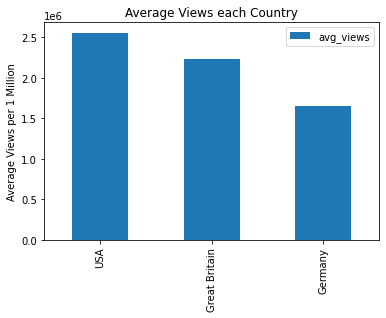

In [39]:
pd.set_option('float_format', '{:f}'.format)
ax = country.sort_values('avg_views', ascending=False).plot(kind='bar', y='avg_views')
ax.set_facecolor('w')  # background white
plt.yticks(np.arange(0, 3000000, 500000))  # ticks grafik y
plt.xticks([0,1,2], ['USA', 'Great Britain', 'Germany'])
ax.set_facecolor('xkcd:white')
plt.title('Average Views each Country')
plt.ylabel('Average Views per 1 Million')
plt.show()

Out of these countries, US has the most viewers

## Based on category Entertainment

In [40]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [41]:
df.trending_date = df.trending_date.dt.date
df.publishedAt = df.publishedAt.dt.date

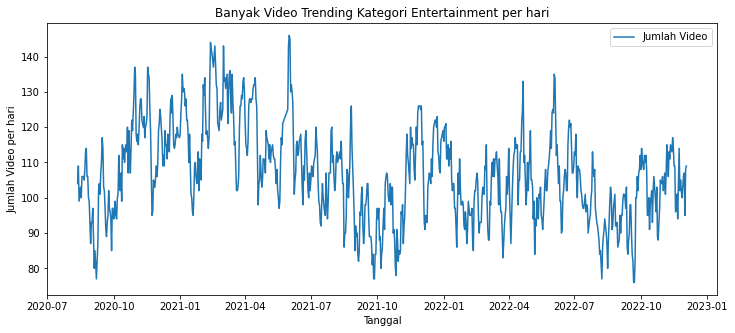

In [42]:
ax = df.loc[df['categoryId']==24]
ax = ax.groupby('trending_date')['video_id'].nunique()  # nunjukin jumlah video berdasarkan tanggal trending
ax.plot(kind='line', x='trending_date', y='video_id', figsize=(12,5))
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Video per hari')
plt.title('Banyak Video Trending Kategori Entertainment per hari')
plt.legend(['Jumlah Video'])
plt.show()

Fluctuating

Towards the end of every year, people like to see entertainment videos on youtube, as it's seen above that the sum of entertainment videos increases every day. Meanwhile trending entertainment videos decreses in mid year.

## Based on Views

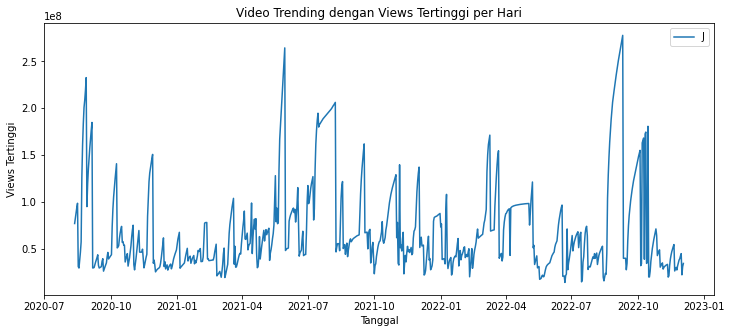

In [43]:
ax = df.groupby('trending_date')['view_count'].max().astype('int64')
ax.plot(kind='line', x='trending_date', y='view_count', figsize=(12,5))
plt.xlabel('Tanggal')
plt.ylabel('Views Tertinggi')
plt.title('Video Trending dengan Views Tertinggi per Hari')
plt.legend('Jumlah Views')
plt.show()

Towards the end of every year, the total views decreases.

In [44]:
df['categoryId']

0         10
1         24
2         24
3         24
4         24
          ..
169585    20
169586    20
169587    20
169588    22
169589     2
Name: categoryId, Length: 508531, dtype: int64

# Categories proportion



In [45]:
cat = video['categoryId'].value_counts().rename_axis('categories').reset_index(name='counts')
cat['Category Name'] = cat['categories'].map({24:'Entertainment',
                                              10:'Music', 
                                              17:'Sport', 
                                              22:'People & Blogs', 
                                              23:'Comedy', 
                                              25:'News & Politics',
                                              15:'Pets & Animals',
                                              2:'Cars & Vehicles',
                                              27:'Education',
                                              1:'Film & Animation',
                                              28:'Science & Technology',
                                              26:'How To & Styles',
                                              20:'Gaming'})
cat

,categories,counts,Category Name
0,24,17291,Entertainment
1,17,12153,Sport
2,10,10442,Music
3,20,9733,Gaming
4,22,7664,People & Blogs
5,23,2902,Comedy
6,25,2860,News & Politics
7,26,2370,How To & Styles
8,2,2362,Cars & Vehicles
9,28,1964,Science & Technology


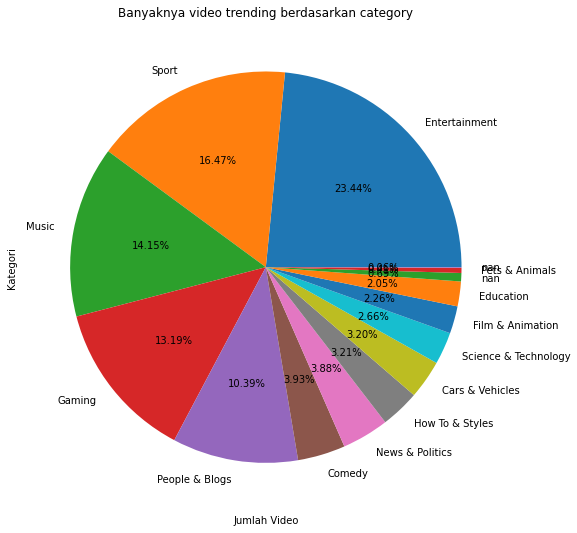

In [46]:
ax = cat['counts'].plot(kind='pie', title='Banyaknya video trending berdasarkan category', labels=cat['Category Name'], autopct='%1.2f%%', figsize=(19,9))
plt.xlabel('Jumlah Video')
plt.ylabel('Kategori')
plt.show()

Entertainment videos are the most liked

## Views per Category per Country

In [47]:
video['Category Name'] = video['categoryId'].map({24:'Entertainment',
                                              10:'Music', 
                                              17:'Sport', 
                                              22:'People & Blogs', 
                                              23:'Comedy', 
                                              25:'News & Politics',
                                              15:'Pets & Animals',
                                              2:'Cars & Vehicles',
                                              27:'Education',
                                              1:'Film & Animation',
                                              28:'Science & Technology',
                                              26:'How To & Styles',
                                              20:'Gaming'})

df['Category Name'] = df['categoryId'].map({24:'Entertainment',
                                              10:'Music', 
                                              17:'Sport', 
                                              22:'People & Blogs', 
                                              23:'Comedy', 
                                              25:'News & Politics',
                                              15:'Pets & Animals',
                                              2:'Cars & Vehicles',
                                              27:'Education',
                                              1:'Film & Animation',
                                              28:'Science & Technology',
                                              26:'How To & Styles',
                                              20:'Gaming'})


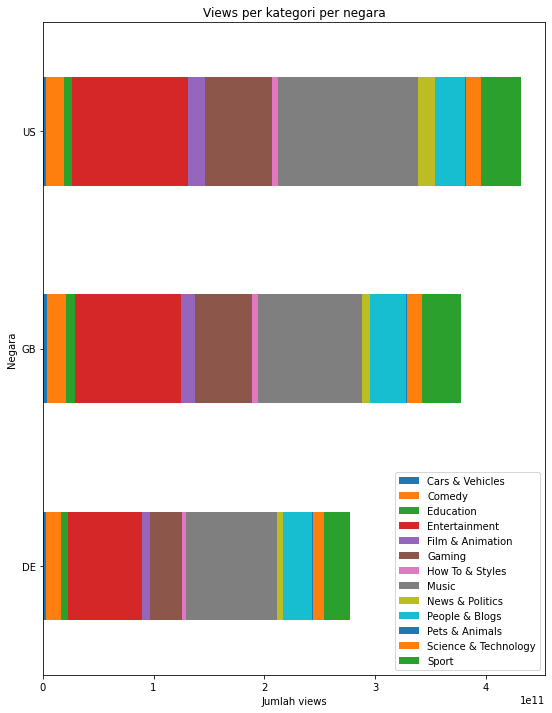

In [48]:
country_category = df.groupby(['country', 'Category Name'])['view_count'].sum().unstack(level=-1)
country_category.reset_index(inplace=True)

# visualize
country_category.plot(
    x = 'country',
    kind = 'barh',
    stacked = True,
    figsize=(9,12),
    title='Views per kategori per negara',
    mark_right=True
)
plt.xlabel('Jumlah views')
plt.ylabel('Negara')
plt.legend(bbox_to_anchor=(1,0), loc='lower right', ncol=1)
plt.show()

# Correlation between features

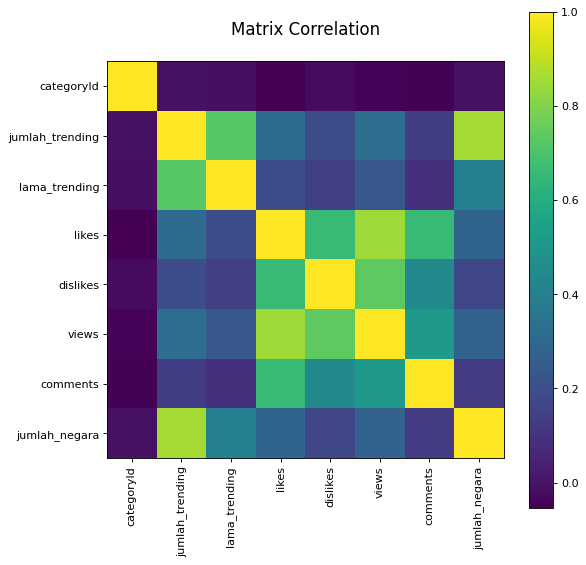

In [59]:
vidcorr = video.corr()
plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='g')
corrMat = plt.matshow(vidcorr, fignum=1)
plt.xticks(range(len(vidcorr.columns)), vidcorr.columns, rotation=90)
plt.yticks(range(len(vidcorr.columns)), vidcorr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Matrix Correlation', fontsize=15)
plt.show()

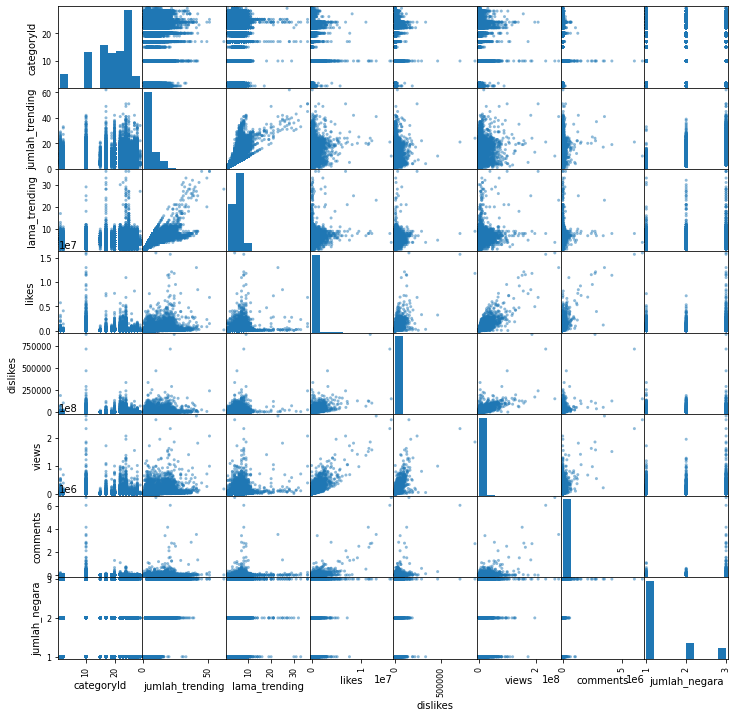

In [60]:
pd.plotting.scatter_matrix(video, figsize=(12,12))
plt.show()

Features that have positive correlation with each other:

- lama_trending & jumlah_trending
- views & likes
- views & dislikes
- likes & dislikes
- jumlah negara & jumlah_trending
- likes & comments